<a href="https://colab.research.google.com/github/Ganeshkumar-p/Personalized_Treatment_Recommendations/blob/main/Personalized_Treatment_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [65]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
data=pd.read_csv("/content/drive/MyDrive/dataset_PMRS/medicaldata.csv")

In [67]:
print(data.columns)

Index(['Name', 'DateOfBirth', 'Gender', 'Symptoms', 'Causes', 'Disease',
       'Medicine'],
      dtype='object')


In [88]:
# prompt: print(data.columns) give count of each columns

for column in data.columns:
  print(f"{column}: {data[column].count()}")

Name: 287
DateOfBirth: 287
Gender: 287
Symptoms: 287
Causes: 287
Disease: 287
Medicine: 287


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         241 non-null    object
 1   DateOfBirth  241 non-null    object
 2   Gender       242 non-null    object
 3   Symptoms     247 non-null    object
 4   Causes       245 non-null    object
 5   Disease      249 non-null    object
 6   Medicine     242 non-null    object
dtypes: object(7)
memory usage: 15.8+ KB


In [69]:
data.isnull().sum()

,0
Name,46
DateOfBirth,46
Gender,45
Symptoms,40
Causes,42
Disease,38
Medicine,45


In [70]:
missing_values = data.isnull().sum()


print(missing_values[missing_values > 0])

Name           46
DateOfBirth    46
Gender         45
Symptoms       40
Causes         42
Disease        38
Medicine       45
dtype: int64


In [71]:
# Step 1: Parse the 'DateOfBirth' column with correct format (dayfirst=True to handle dd-mm-yyyy)
data['DateOfBirth'] = pd.to_datetime(data['DateOfBirth'], dayfirst=True, errors='coerce')

# Step 2: Calculate the median date, ignoring missing values
median_date = data['DateOfBirth'].dropna().median()

# Step 3: Fill missing values in 'DateOfBirth' with the median date
data['DateOfBirth'] = data['DateOfBirth'].fillna(median_date)

# Step 4: Handle missing values for categorical columns
categorical_columns = ['Gender', 'Symptoms', 'Causes', 'Disease', 'Medicine']
for column in categorical_columns:
    # Fill missing values with the most frequent (mode) value in each column
    data[column] = data[column].fillna(data[column].mode()[0])


In [72]:

missing_values = data.isnull().sum()


print(missing_values[missing_values > 0])

Name    46
dtype: int64


In [73]:
# Instead of using inplace=True, reassign the filled column back to the DataFrame
data['Name'] = data['Name'].fillna('Unknown')

In [74]:
data.isnull().sum()

,0
Name,0
DateOfBirth,0
Gender,0
Symptoms,0
Causes,0
Disease,0
Medicine,0


In [75]:
missing_values = data.isnull().sum()


print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [76]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

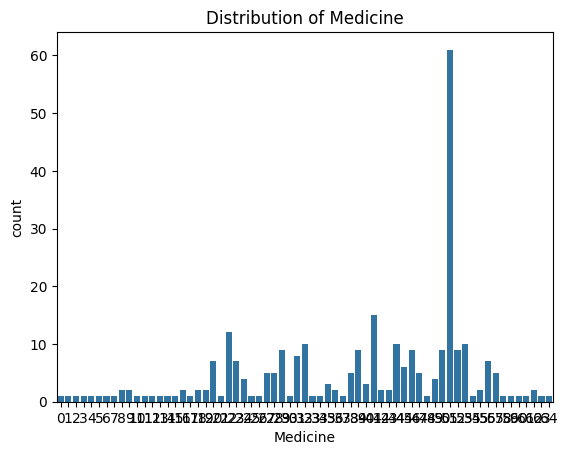

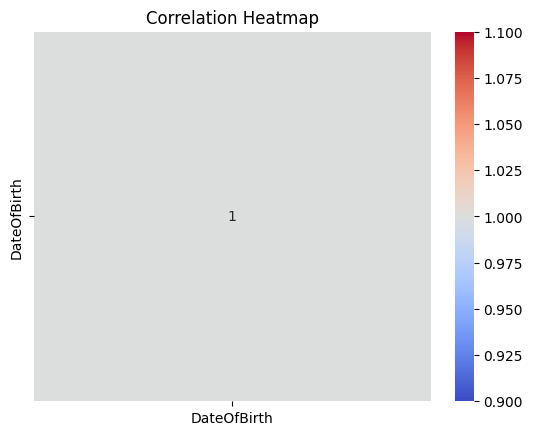

In [77]:
sns.countplot(data=data, x='Medicine')
plt.title('Distribution of Medicine')
plt.show()


numeric_columns = ['DateOfBirth']
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [78]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

In [79]:
X = data.drop('Medicine', axis=1)
y = data['Medicine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
X_train = X_train.drop('DateOfBirth', axis=1)
X_test = X_test.drop('DateOfBirth', axis=1)


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.8448275862068966


In [81]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.896551724137931


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=42, max_iter=500)
logreg_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logreg = logreg_classifier.predict(X_test_scaled)

# Evaluate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")


Logistic Regression Accuracy: 0.5172413793103449


In [83]:
from sklearn.metrics import classification_report

# Use zero_division=0 to handle cases where precision or recall is undefined
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg, zero_division=0))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          19       1.00      1.00      1.00         1
          20       1.00      0.50      0.67         2
          21       0.00      0.00      0.00         0
          22       1.00      1.00      1.00         1
          23       1.00      1.00      1.00         3
          27       1.00      1.00      1.00         2
          28       0.50      1.00      0.67         1
          29       0.50      1.00      0.67         1
          31       1.00      1.00      1.00         3
          32       1.00      1.00      1.00         4
          35       0.00      0.00      0.00         0
          38       1.00      1.00      1.00 

In [85]:
import pandas as pd
from sklearn.metrics import classification_report

# Get classification report for each model
report_dt = classification_report(y_test, y_pred_dt, output_dict=True, zero_division=0)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True, zero_division=0)

# Extract the relevant metrics: accuracy, precision, recall, f1-score for the 'macro avg'
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

# Prepare data for the table: Create a dictionary where keys are the models and values are their respective metrics
table_data = {
    'Metric': metrics,
    'Decision Tree': [
        report_dt['accuracy'],
        report_dt['macro avg']['precision'],
        report_dt['macro avg']['recall'],
        report_dt['macro avg']['f1-score']
    ],
    'Random Forest': [
        report_rf['accuracy'],
        report_rf['macro avg']['precision'],
        report_rf['macro avg']['recall'],
        report_rf['macro avg']['f1-score']
    ],
    'Logistic Regression': [
        report_logreg['accuracy'],
        report_logreg['macro avg']['precision'],
        report_logreg['macro avg']['recall'],
        report_logreg['macro avg']['f1-score']
    ]
}

# Create the pandas DataFrame
comparison_df = pd.DataFrame(table_data)

# Display the table
print("Model Performance Comparison:")
print(comparison_df)


Model Performance Comparison:
      Metric  Decision Tree  Random Forest  Logistic Regression
0   accuracy       0.844828       0.896552             0.517241
1  precision       0.653017       0.694196             0.391975
2     recall       0.620690       0.684524             0.409877
3   f1-score       0.621876       0.682181             0.371581


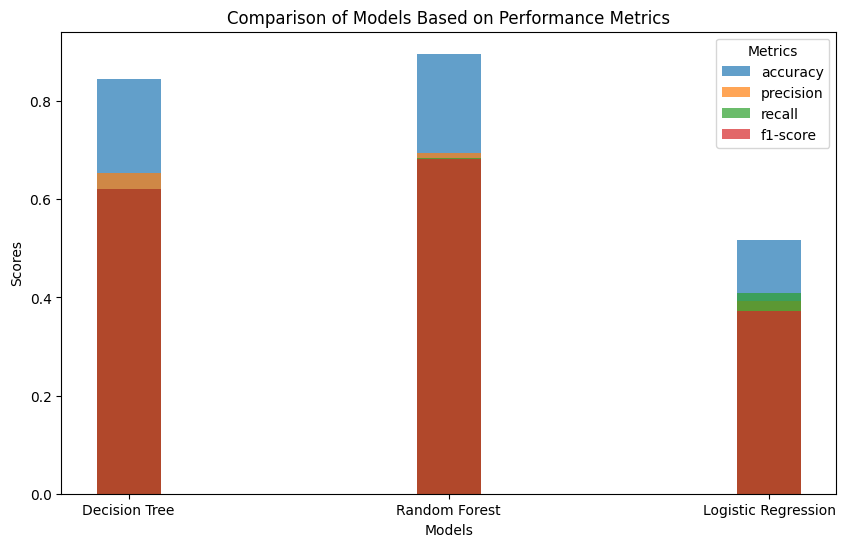

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report for each model
report_dt = classification_report(y_test, y_pred_dt, output_dict=True, zero_division=0)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True, zero_division=0)

# Extract metrics: precision, recall, f1-score for each class, and accuracy
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

# Prepare data for plotting
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
metric_values = {metric: [report_dt['accuracy'] if metric == 'accuracy' else report_dt['macro avg'][metric],
                          report_rf['accuracy'] if metric == 'accuracy' else report_rf['macro avg'][metric],
                          report_logreg['accuracy'] if metric == 'accuracy' else report_logreg['macro avg'][metric]]
                 for metric in metrics}

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(models))

# Plot each metric (precision, recall, f1-score, accuracy)
for i, metric in enumerate(metrics):
    ax.bar(x, metric_values[metric], label=metric, width=0.2, align='center', alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(models)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models Based on Performance Metrics')
ax.legend(title='Metrics')

plt.show()
